In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# Reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


C:\Users\Juan\AppData\Local\Temp\ipykernel_31272\2246213908.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [35]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most recent date: {recent_date[0]}")

Most recent date: 2017-08-23


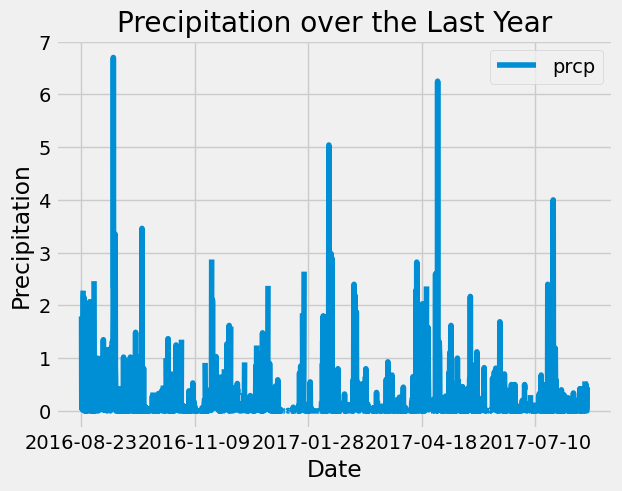

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
df_precipitation.set_index('date', inplace=True)

# Sort the dataframe by date
df_precipitation.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(title='Precipitation over the Last Year')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()


In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df_precipitation.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Station).count()
print(f"Number of stations: {num_stations}")

Number of stations: 9


In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_activity)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
temperature_stats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Temperature stats for the most active station ({most_active_station}): {temperature_stats}")


Temperature stats for the most active station (USC00519281): [(54.0, 71.66378066378067, 85.0)]


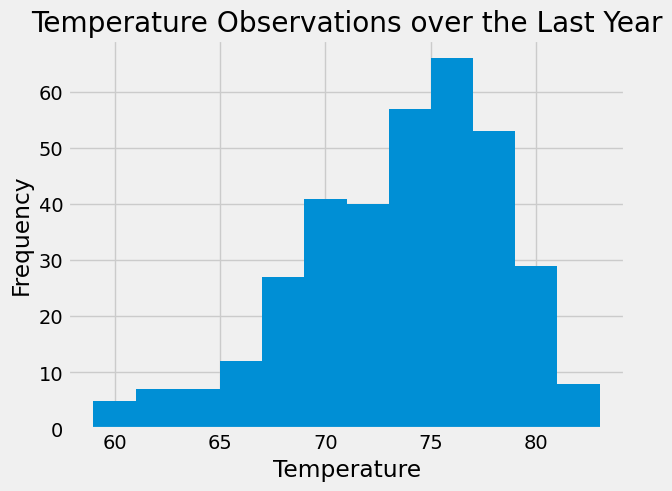

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= one_year_ago).all()
df_tobs = pd.DataFrame(tobs_data, columns=['date', 'tobs'])

# Plot histogram
df_tobs['tobs'].plot(kind='hist', bins=12, title='Temperature Observations over the Last Year')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [45]:
# Close Session
session.close()